In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Iseas5 = xr.open_dataarray('../data/SEAS5_monthly_z500_7wr_noa_bias1981-2010_201101-202412.nc').mean(dim='number')
Iera5  = xr.open_dataarray('../data/monthly_z500_7wr_noa_19400101-20241201.nc')

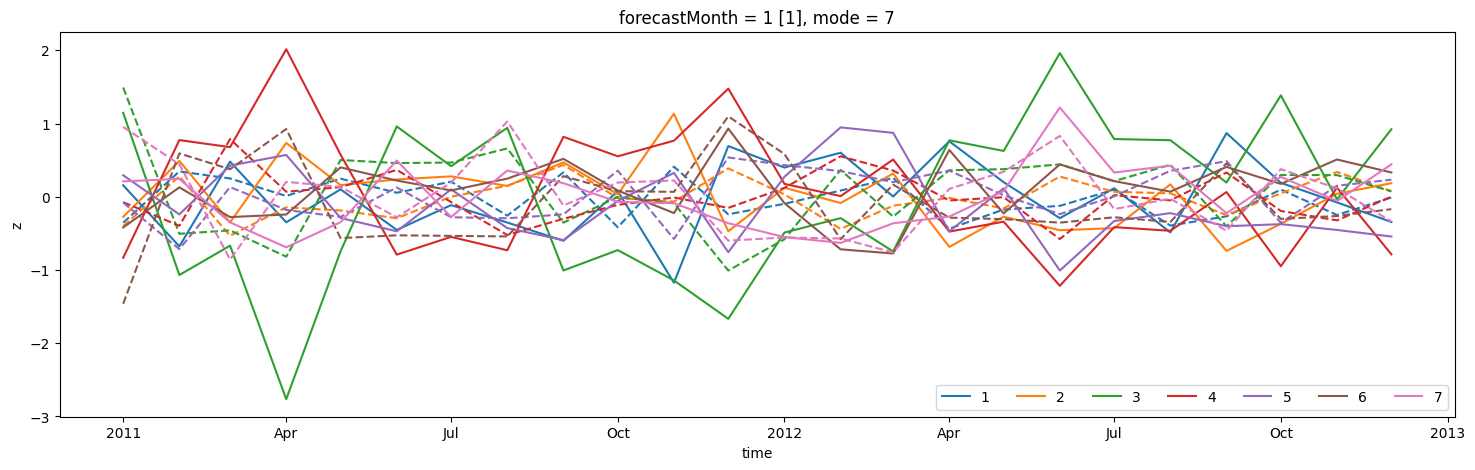

In [26]:
plt.figure(figsize=(18,5))
for mode in Iera5.mode:
    p = Iera5.sel(mode=mode, time=slice('2011', '2012')).plot(label=mode.values)
    c = p[0].get_color()
    Iseas5.sel(mode=mode, forecastMonth=1, time=slice('2011', '2012')).plot(ls='--', color=c)
plt.legend(ncols=7)

In [3]:
corr = xr.DataArray(
    dims=['mode', 'forecastMonth'],
    coords=dict(
        mode = range(1, 8),
        forecastMonth = Iseas5.forecastMonth
    )
)

for forecastMonth in Iseas5.forecastMonth.data:
    print(f'forecastMonth = {forecastMonth}  ', end='\r')
    forecast = Iseas5.sel(forecastMonth=forecastMonth)

    # shift Iseas5 for comparison with Iera5
    offset = pd.DateOffset(months=forecastMonth-1)
    reference_time  = pd.to_datetime(forecast['time'])
    prediction_time = reference_time + offset
    forecast['time'] = prediction_time

    corr.loc[dict(forecastMonth=forecastMonth)] = xr.corr(forecast, Iera5, dim='time')


Text(0, 0.5, 'forecast month')

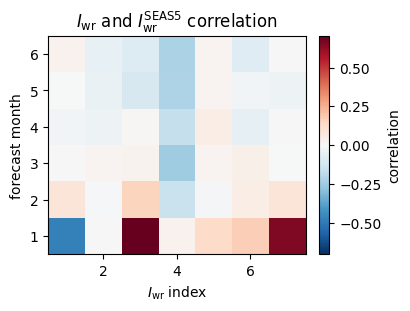

In [4]:
columnwidth = 248. #236
fig = plt.figure(figsize=(4,3), layout="constrained")
corr.T.plot(cbar_kwargs={'label': 'correlation'})

plt.title(r'$I_{\rm wr}$ and $I^{\rm SEAS5}_{\rm wr}$ correlation')
plt.xlabel(r'$I_{\rm wr}$ index')
plt.ylabel('forecast month')
